In [1]:
import bs4
from urllib.request import urlopen as ureq
from bs4 import BeautifulSoup as Soup

In [2]:
def Extract(raj):
    f = open("Electron.txt", "a+", encoding = "utf-8")
    for c in raj:
        question_summary = c.a.text
        tags = []
        question_tags = c.findAll("div", {"class":"tags"})
        tagies = question_tags[0].findAll("a")
        for i in range(0,len(tagies)):
            tags.append(tagies[i].text)
            f.write("_label_"+tags[i]+" ")
        f.write(question_summary+"\n")
    f.close()

In [3]:
def data(i):
    my_url = "https://electronics.stackexchange.com/questions?tab=newest&page="+str(i)+"&pagesize=50"
    uclient = ureq(my_url) # opens up the connection grabs the web page and stores in a variable
    page_html = uclient.read()
    uclient.close()
    page_soup = Soup(page_html, "html.parser")
    containers = page_soup.findAll("div", {"class":"question-summary"})
    raj = containers[0:50]
    Extract(raj)

In [4]:
for i in range(1,200):
    data(i)

In [5]:
for i in range(201,400):
    data(i)

In [6]:
for i in range(401,600):
    data(i)

In [7]:
for i in range(601,800):
    data(i)

In [8]:
for i in range(801,1000):
    data(i)

In [9]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Praveen\Praveen_ADS_Project\Electronics.txt',error_bad_lines=False,header = None)
data

b'Skipping line 15: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 2\nSkipping line 38: expected 1 fields, saw 4\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 60: expected 1 fields, saw 2\nSkipping line 74: expected 1 fields, saw 2\nSkipping line 101: expected 1 fields, saw 2\nSkipping line 123: expected 1 fields, saw 2\nSkipping line 132: expected 1 fields, saw 2\nSkipping line 133: expected 1 fields, saw 2\nSkipping line 147: expected 1 fields, saw 2\nSkipping line 148: expected 1 fields, saw 2\nSkipping line 164: expected 1 fields, saw 2\nSkipping line 172: expected 1 fields, saw 2\nSkipping line 190: expected 1 fields, saw 2\nSkipping line 209: expected 1 fields, saw 2\nSkipping line 210: expected 1 fields, saw 2\nSkipping line 213: expected 1 fields, saw 2\nSkipping line 214: expected 1 fields, saw 3\nSkipping line 222: expected 1 fields, saw 2\nSkipping line 250: expected 1 fields, saw 3\nSkipping line 263: expected 1 fields, saw 2\nSkipping line 

,0
0,__label__dialogue What does the line 'Your wei...
1,__label__star-wars __label__return-of-the-jedi...
2,__label__plot-explanation __label__district-9 ...
3,__label__parasite What is the significance of ...
4,__label__the-shining Are the twins from The Sh...
5,__label__plot-explanation __label__character _...
6,__label__plot-explanation __label__constantine...
7,__label__1983 What year is 1983 set?
8,__label__suits How old is Sheila Sazs supposed...
9,__label__plot-explanation __label__character _...


In [10]:
label_data = data[0].str.count("_label_")
print('Total label count is:',data[0].str.count("_label_").sum())

Total label count is: 119482


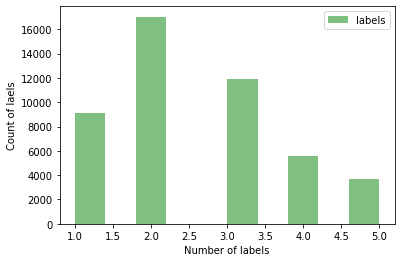

In [12]:
import matplotlib.pyplot as plt
plt.hist(label_data, alpha=0.5, color = 'green', label='labels')
plt.xlabel('Number of labels')
plt.ylabel('Count of laels')
plt.legend(loc='upper right')
plt.show()